In [1]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import scipy as sp
import soundfile as sf
import scipy.signal as signal
import matplotlib.pyplot as plt
import IPython as ipy
import seaborn as sns
sns.set()

## TA's Email
CHENGENG001@e.ntu.edu.sg

# Data Set Source
The <a href="https://www.kaggle.com/datasets/rtatman/british-birdsong-dataset">British Birdsong Dataset</a>  

## About Dataset
### Context:
Birds use songs and calls of varying length and complexity to attract mates, warn of nearby danger and mark their territory. This dataset contains a recordings of different birdsongs from bird species that can be found in Britain (although the recordings themselves are from many different locations).

### Content:
This is a dataset of bird sound recordings, a specific subset gathered from the Xeno Canto collection to form a balanced dataset across 88 species commonly heard in the United Kingdom. It was originally compiled by Dan Stowell and shared on Archive.org.

The copyright in each audio file is owned by the user who donated the file to Xeno Canto. Please see `"birdsong_metadata.tsv"` for the full listing, which gives the authors' names and the CC licences applicable for each file. The audio files are encoded as `.flac` files.

### Acknowledgements:
These recordings were collected by 68 separate birding enthusiasts and uploaded to and stored by xeno-canto: www.xeno-canto.org. If you make use of these recordings in your work, please cite the specific recording and include acknowledgement of and a link to the xeno-canto website.

**The following references are to help the group on the project, to clean up after we are done**

# References
- <a>https://github.com/IliaZenkov/sklearn-audio-classification/blob/master/sklearn_audio_classification.ipynb</a>
- <a>https://towardsdatascience.com/decoding-the-symphony-of-sound-audio-signal-processing-for-musical-engineering-c66f09a4d0f5</a>
- <a>https://www.freecodecamp.org/news/writing-good-commit-messages-a-practical-guide/</a>
- <a>http://librosa.org/doc/0.10.1/feature.html</a>
- <a>https://markdown.land</a>

# Motivation

We perceive bird songs to be distinctive and that different birds would likely produce different kind songs charactersitic of their species. Yet, it is often very diffiult to get a clear, full view of the particular bird as it may be well hidden within the depths of the forest, or it is simply too skittish and would fly away as we approach. By matching the audio features of bird songs to the species, we can help improve conservation efforts, allowing researchers to identify and estimate the population size of a particular species. Another benefit is to allow the general public, not just experienced bird watchers, to appreciate the diversity and beauty of nature in a different way. 

This project is by no means, anything close to new or groundbreaking. Yet, we find it interesting to process unstructured data and wish to explore beyond the curriculum of this module. Afterall, most of what we percieve in the real world are indeed unstructured data. This project serves as the invaluable learning experience for our team

# Metadata analysis

In [2]:
meta_data = pd.read_csv('./bird/birdsong_metadata.csv')
meta_data.head()

file_id         genus    species   english_cname who_provided_recording  \
0   132608      Acanthis    flammea  Common Redpoll         Jarek Matusiak   
1   132611      Acanthis    flammea  Common Redpoll         Jarek Matusiak   
2    35068      Acanthis    flammea  Common Redpoll             Sander Bot   
3    82715  Acrocephalus  palustris   Marsh Warbler         Dougie Preston   
4    64685  Acrocephalus  palustris   Marsh Warbler         Dougie Preston   

          country  latitude  longitute                     type  \
0          Poland   50.7932    15.4995       female, male, song   
1          Poland   50.7932    15.4995  flight call, male, song   
2     Netherlands   52.8176     6.4326               call, song   
3  United Kingdom   60.3539    -1.2689                     Song   
4  United Kingdom   60.3539    -1.2689                     Song   

                                             license  
0  http://creativecommons.org/licenses/by-nc-sa/3.0/  
1  http://creativecommons.org/licenses/by-nc-sa/3.0/  
2  http://creativecommons.org/licenses/by-nc-nd/2.5/  
3  http://creativecommons.org/licenses/by-nc-nd/2.5/  
4  http://creativecommons.org/licenses/by-nc-nd/2.5/

## Descriptions of Variables  
- `file_id`:
- `genus`:
- `species`:
- `english_cname`:
- `who_provided_recording`:
- `country`:
- `latitude`:
- `longitute`:
- `type`:
- `license`:

First and foremost, we need to understand the data that we are working on. One important thing is to know how many speicies of birds are there and the distributions of their number of recordings.

In [3]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   file_id                 264 non-null    int64  
 1   genus                   264 non-null    object 
 2   species                 264 non-null    object 
 3   english_cname           264 non-null    object 
 4   who_provided_recording  264 non-null    object 
 5   country                 264 non-null    object 
 6   latitude                261 non-null    float64
 7   longitute               261 non-null    float64
 8   type                    264 non-null    object 
 9   license                 264 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 20.8+ KB


<Axes: xlabel='english_cname'>

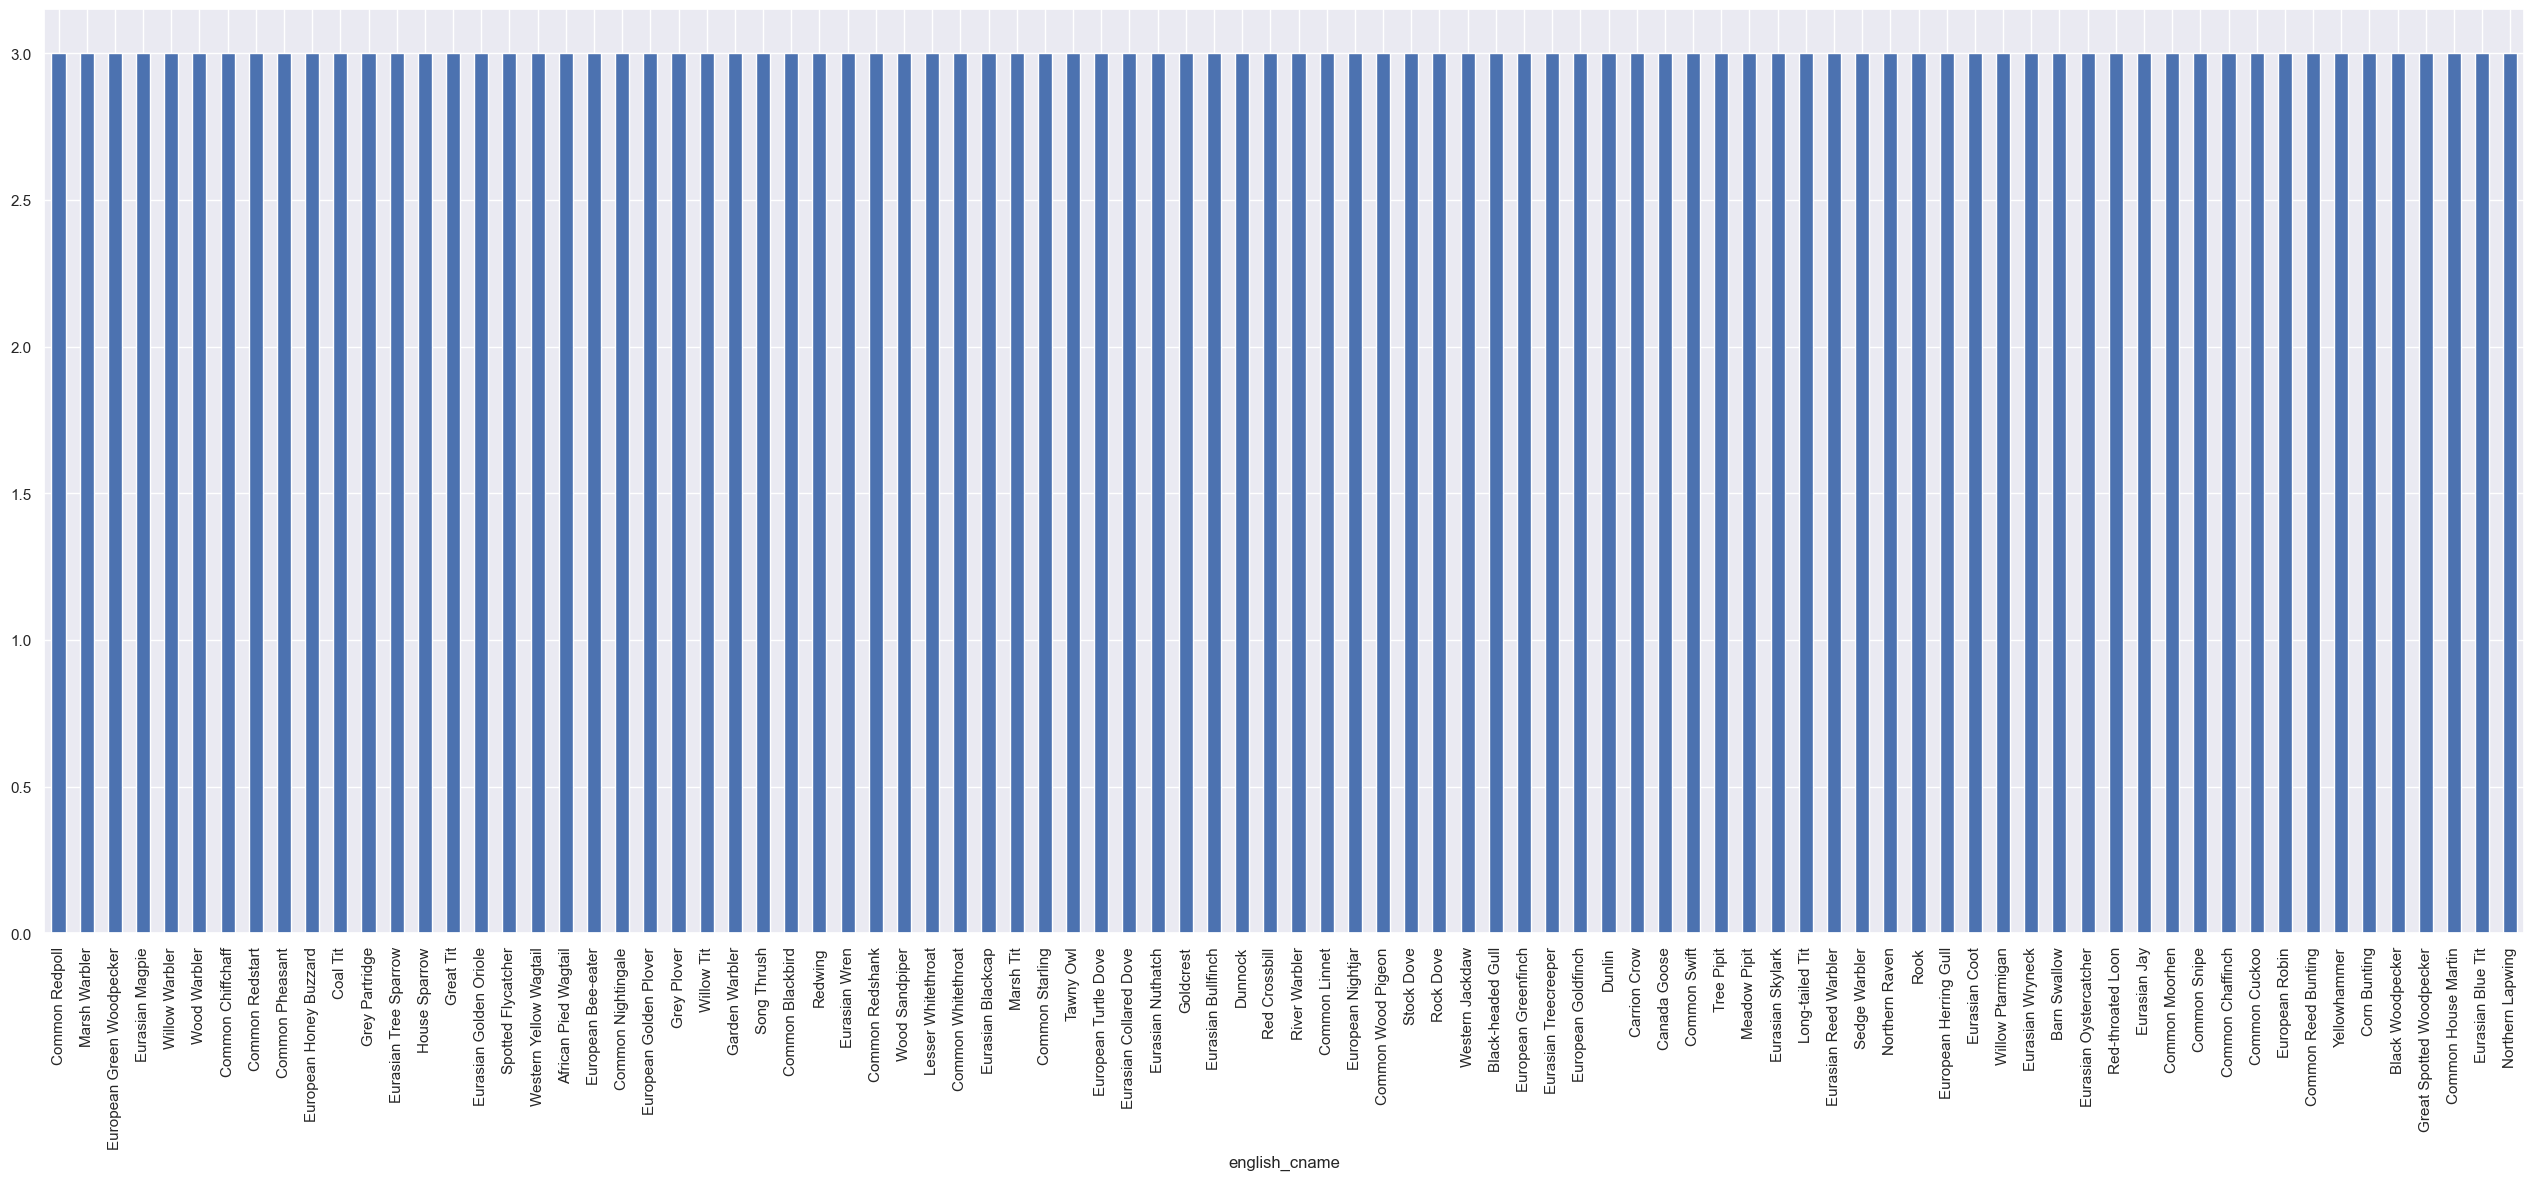

In [4]:
f = plt.figure(figsize=(32,12))
meta_data['english_cname'].value_counts().plot(kind='bar')

In [5]:
meta_data['english_cname'].describe()

count                264
unique                88
top       Common Redpoll
freq                   3
Name: english_cname, dtype: object

In [6]:
meta_data['english_cname'].value_counts()

english_cname
Common Redpoll               3
Marsh Warbler                3
European Green Woodpecker    3
Eurasian Magpie              3
Willow Warbler               3
                            ..
Black Woodpecker             3
Great Spotted Woodpecker     3
Common House Martin          3
Eurasian Blue Tit            3
Northern Lapwing             3
Name: count, Length: 88, dtype: int64

In [7]:
meta_data['english_cname'].value_counts().describe()

count    88.0
mean      3.0
std       0.0
min       3.0
25%       3.0
50%       3.0
75%       3.0
max       3.0
Name: count, dtype: float64

In [8]:
pd.unique(meta_data['english_cname'])

array(['Common Redpoll', 'Marsh Warbler', 'Sedge Warbler',
       'Eurasian Reed Warbler', 'Long-tailed Tit', 'Eurasian Skylark',
       'Meadow Pipit', 'Tree Pipit', 'Common Swift', 'Canada Goose',
       'Dunlin', 'European Nightjar', 'European Goldfinch',
       'Eurasian Treecreeper', 'European Greenfinch', 'Black-headed Gull',
       'Western Jackdaw', 'Rock Dove', 'Stock Dove', 'Common Wood Pigeon',
       'Northern Raven', 'Carrion Crow', 'Rook', 'Common Cuckoo',
       'Eurasian Blue Tit', 'Common House Martin',
       'Great Spotted Woodpecker', 'Black Woodpecker', 'Corn Bunting',
       'Yellowhammer', 'Common Reed Bunting', 'European Robin',
       'Common Chaffinch', 'Eurasian Coot', 'Common Snipe',
       'Common Moorhen', 'Eurasian Jay', 'Red-throated Loon',
       'Eurasian Oystercatcher', 'Barn Swallow', 'Eurasian Wryneck',
       'Willow Ptarmigan', 'European Herring Gull', 'Common Linnet',
       'River Warbler', 'Red Crossbill', 'Common Nightingale',
       'European

It looks like we have **88** unique bird species (based on their English common names), and every species have exactly **3** recordings. This is because the **standard deviation** of the `value_counts()` data is **0** and the **mean** is **0**. This tells us that we have a balanced number of classes.

Next, we will also be looking at the distribution of the locations that these recordings were made. We see that most of the recordings were taken in the United Kingdom. 

<Axes: xlabel='country'>

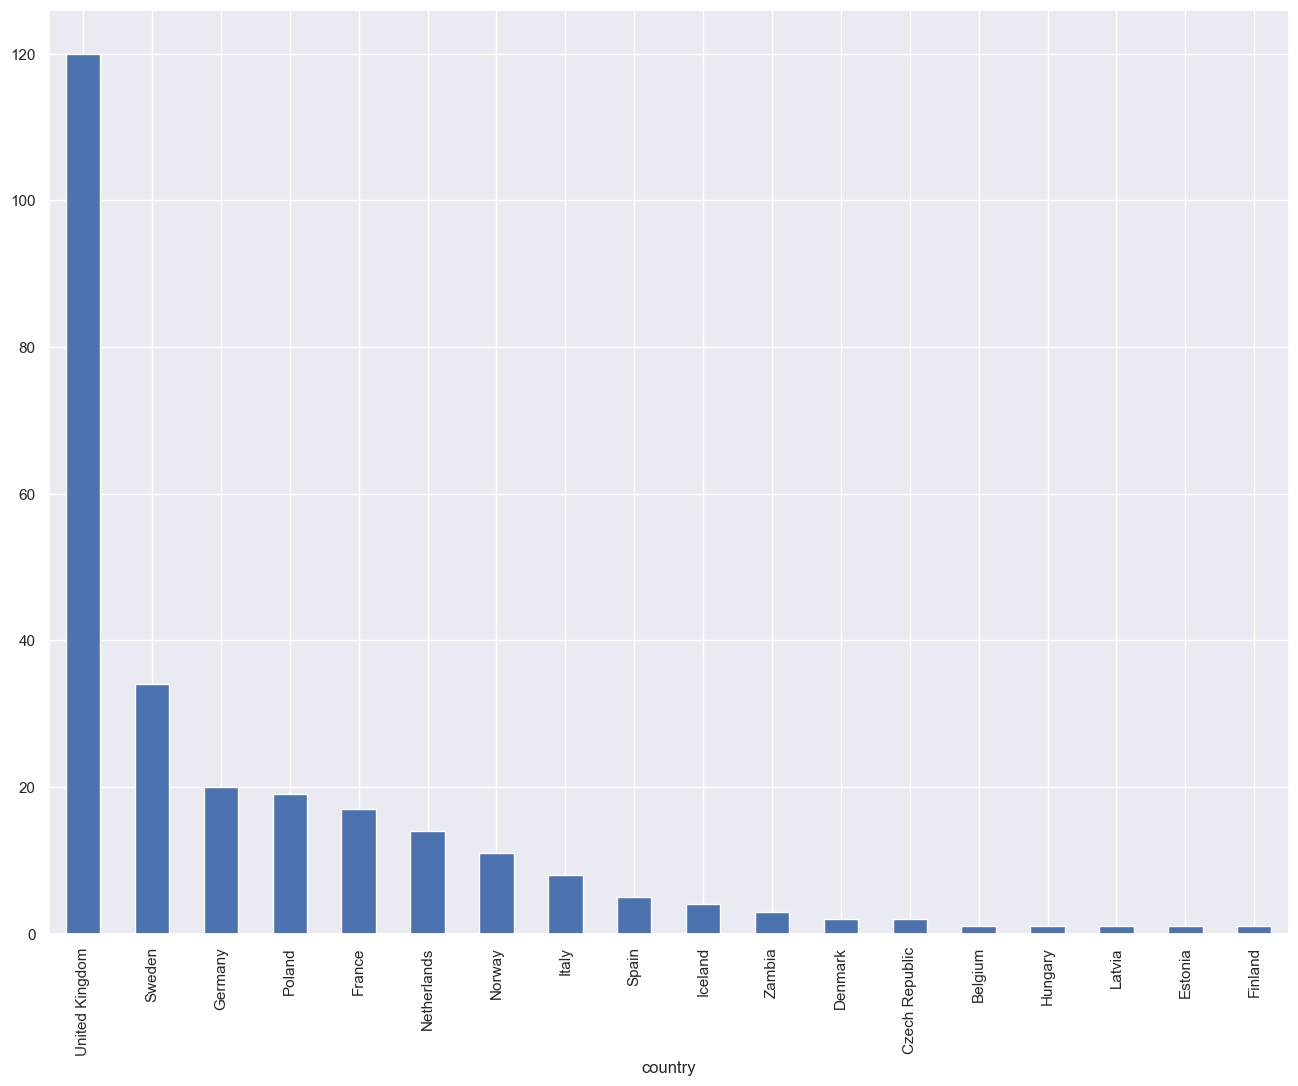

In [9]:
f = plt.figure(figsize=(16, 12))
meta_data['country'].value_counts().plot(kind='bar')

# **Audio Analysis**  

Next, we will explore the audio data. Just as we need a decent foundational understanding of statistics for general numeric analysis, we also need to understand how sound works.

## **Understanding Sound and Wave**

Sound is a mechanical disturbance from a state of equilibrium that propagates through an elastic material medium <a href="https://www.britannica.com/science/sound-physics">[1]</a>

(to include brief explanation)  

A wave form contains **measurable** information such as the `amplitude` and `period`.   

Amplitude is the the maximum displacement or distance moved by a point on a vibrating body or wave measured from its equilibrium position <a href="https://www.britannica.com/science/amplitude-physics">[2]</a>. Amplitude is what we percieve *"loudness"* to be, a positive relationship. 

Period is the interval of time it takes for a motion to repeat <a href="https://www.britannica.com/science/period-physics">[3]</a>. Particularly, we are interested in the *frequency*. Frequency is such that  

<p style="text-align: center">$frequency = \frac{1}{period}$</p>

it is how we perceive *"pitch"* to be, a positive relationship.  

Another important concept is the *intensity* of sound. It is the ratio between the energy of the wave propagation and the area it is directed to.  **Decibel** measures  the ratio between two intensities, such as the relative loudness of sounds <a href="https://www.britannica.com/science/decibel">[4]</a>. Sometimes, we would use the reference intensity of the **threshold of hearing**, which is the lowest intensity of sound that is audible.

## **Digital representation of Sound**

Sound in real world is an analog data, which is **continuous** and can take **infinite** range. We try to replicate and represent this analog data in a digital data, which is **discrete**, and takes **limited** range. The resultant ADC(analog-to-digital conversion) of sound, is **digital audio signal**, also known as **pulse-code modulation**.

### The ADC Process

There are broadly, two steps in the ADC process.
- Sampling
- Qunatisation

(to include brief explanation)

**Sampling** refers to taking the *array* of amplitudes occuring at each constant interval, $T$. The **sampling rate**, $S_r$ is given by $S_r = \frac{1}{T}$. The sampling rate represents the number of samples that we have in each second of the digital signal.  

In quantisation, we group amplitude values closest to the assigned discrete **quantisation values**, which introduces **quanitsation error**. The higher the **quantisation resolution** (more discrete quantisation values), the lower the **quantisation error**. 


## **Framing**

We are not only interested in amplitude at each discrete time interval, we are also interested in the *variation* of amplitude across time. 

As such, we want to group these time intervals in a **frame**. (also to introduce to the concept of Nyquist Frequency). 

(Introduce the concept of the hop length)

(Introduce why frames are in a particular way)

Note that our frame size is usually in powers of 2 so it allows us to take advantage of **Fast Fourier Transform**

# **Time Domain Exploration**

## **Amplitude Envelope**

Amplitude envelope shows the **maximum amplitude** given in **each frame**. `librosa` does not provide a direct way in finding the amplitude envelope, and hence we defined our own function.

## **Root-Mean-Squared (RMS) Energy**
RMS energy represents the **overall intensity** of the signal by taking into account of all of the frames. This is abstracted by the feature methods in `librosa`. RMS energy is another indicator of loudness, and is less sensitive to outliers than Amplitude Envelope

<p style="text-align: center"><code>librosa.feature.rms(*, y=None, S=None, frame_length=2048, hop_length=512, center=True, pad_mode='constant', dtype=<class 'numpy.float32'>)</code></p>

## **Zero Crossing Rate**
It is the number of times a signal crosses the horizontal axis (0). Generally, the higher the number of zero corssing rate, the higher the "pitch" is. This is also abstracted by the feature methods in `librosa`.

<p style="text-align: center"><code>librosa.feature.zero_crossing_rate(y, *, frame_length=2048, hop_length=512, center=True, **kwargs)</code></p>

We will be looking at two samples of the same species, the **Common Redpoll**, as well as samples from **Marsh Warbler**. Play the audio clip to have a sense of how the bird song sounds like.

In [10]:
# Constant declaration

FRAME_SIZE = 1024
HOP_LEN = 512
# these are common parameters

# Function Definitions

# Librosa does not have a built-in Amplitude Envelope extractor, so we need to create our own
# amplitude envelope (overlapping frames to account for losses at the edges)
# returns an array, used list comprehension. For each of the frame interval get the max (amplitude), and append to the array, interating by the hop lengths
def amplitude_envelope(signal, frame_size, hop_length):
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])


# plots a waveform graph for ONE sample
def plot_waveform(address, title):
    with sf.SoundFile(address) as audio:
        waveform = audio.read()
        sample_rate = audio.samplerate
    # important to specify color in .waveshow() otherwise it may not work as per documentation
    ae = amplitude_envelope(waveform, FRAME_SIZE, HOP_LEN)
    # take every index of the time interval, multiply by the hop length we defined, then divide by the rate to get actual time transpired
    t = np.arange(len(ae)) * HOP_LEN / sample_rate

    zrc = librosa.feature.zero_crossing_rate(y=waveform, frame_length=FRAME_SIZE, hop_length=HOP_LEN)[0]
    rms = librosa.feature.rms(y=waveform, frame_length=FRAME_SIZE, hop_length=HOP_LEN)[0]
    t_rms = np.arange(len(rms)) * HOP_LEN / sample_rate
    t_zrc = np.arange(len(zrc)) * HOP_LEN / sample_rate
    
    plt.figure(figsize=(16,12))

    librosa.display.waveshow(waveform, sr=sample_rate, color="b", alpha=0.5) # alpha corresponds to transparency (visualising density)
    plt.plot(t, ae, color="r", label="Amplitude Envelope")
    plt.plot(t_rms, rms, color="g", label="RMS Energy")
    plt.plot(t_zrc, zrc, color="y", label="Zero Crossing Rate")
    plt.xlabel('Time / s')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.legend()
    plt.show()


# get basic information of the audio clip
def get_basic_info(path):
    audioData, sampleRate = librosa.load(path)
    print("Duration of audio clip: {:.2f}s".format(librosa.get_duration(path=path)))
    # adjusted to 2 decimal places to keep the values neater, as we do not need to show so many precision
    print("Sample size of audio clip (one parameter for mono, two for stereo):", audioData.shape)
    print("Sample Rate of aduio clip:", sampleRate)


# Draw the spectrogram using Short-time-Fourier-Transformation
def plot_stft(path, title):
    with sf.SoundFile(path) as audio:
        waveform = audio.read()
        sample_rate = audio.samplerate
    stft_spectrum_matrix = librosa.stft(waveform)
    plt.figure(figsize=(16, 12))
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')
    plt.title(title)
    plt.colorbar(format='%+2.0f dB')
    plt.show()


#################################################################
#           Functions for Comparing The different Features     #
################################################################

# The function will compare which is of the shorter duration, and load them to be the same duration for better visualisation

def find_shorter_duration(path1, path2):
    duration1 = librosa.get_duration(path=path1)
    duration2 = librosa.get_duration(path=path2)
    return min(duration1, duration2)

def compare_ampltidue_envelope(path1, path2, title1, title2):
    duration = find_shorter_duration(path1, path2)
    signal1, sr1 = librosa.load(path1, duration=duration)
    signal2, sr2 = librosa.load(path2, duration=duration)
    ae1 = amplitude_envelope(signal1, FRAME_SIZE, HOP_LEN)
    ae2 = amplitude_envelope(signal2, FRAME_SIZE, HOP_LEN)
    t1 = np.arange(len(ae1)) * HOP_LEN / sr1
    t2 = np.arange(len(ae2)) * HOP_LEN / sr2
    plt.figure(figsize=(16,12))
    plt.ylim(0, 0.3)
    plt.plot(t1, ae1, color='r', label=title1)
    plt.plot(t2, ae2, color='b', label=title2)
    plt.title("Amplitude Envelope")
    plt.xlabel('Time / s')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

def compare_rms_energy(path1, path2, title1, title2):
    duration = find_shorter_duration(path1, path2)
    signal1, sr1 = librosa.load(path1, duration=duration)
    signal2, sr2 = librosa.load(path2, duration=duration)
    rms1 = librosa.feature.rms(y=signal1, frame_length=FRAME_SIZE, hop_length=HOP_LEN)[0]
    rms2 = librosa.feature.rms(y=signal2, frame_length=FRAME_SIZE, hop_length=HOP_LEN)[0]
    t1 = np.arange(len(rms1)) * HOP_LEN / sr1
    t2 = np.arange(len(rms2)) * HOP_LEN / sr2
    plt.figure(figsize=(16,12))
    plt.ylim(0, 0.1)
    plt.plot(t1, rms1, color='r', label=title1)
    plt.plot(t2, rms2, color='b', label=title2)
    plt.title("RMS Energy")
    plt.xlabel('Time / s')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

def compare_zrc(path1, path2, title1, title2):
    duration = find_shorter_duration(path1, path2)
    signal1, sr1 = librosa.load(path1, duration=duration)
    signal2, sr2 = librosa.load(path2, duration=duration)
    zrc1 = librosa.feature.zero_crossing_rate(y=signal1, frame_length=FRAME_SIZE, hop_length=HOP_LEN)[0]
    zrc2 = librosa.feature.zero_crossing_rate(y=signal2, frame_length=FRAME_SIZE, hop_length=HOP_LEN)[0]
    t1 = np.arange(len(zrc1)) * HOP_LEN / sr1
    t2 = np.arange(len(zrc2)) * HOP_LEN / sr2
    plt.figure(figsize=(16,12))
    plt.ylim(0, 700)
    # We want to find the ACTUAL ZRC, not the normalised one
    plt.plot(t1, zrc1*FRAME_SIZE, color='r', label=title1)
    plt.plot(t2, zrc2*FRAME_SIZE, color='b', label=title2)
    plt.title("Zero Crossing Rate")
    plt.xlabel('Time / s')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

    
######################################################################

## Getting Started

Let's first *listen* to the data that we will be working on. We will explore just two birds first, namely **Common Redpoll** and **Marsh Warbler**

## **Common Redpoll**

Bird song sample `xc132608` of the **Common Redpoll**

In [11]:
ipy.display.Audio("./bird/songs/songs/xc132608.flac")

We check the basic information of the audio clip

In [12]:
get_basic_info("./bird/songs/songs/xc132608.flac")

Duration of audio clip: 38.56s
Sample size of audio clip (one parameter for mono, two for stereo): (850176,)
Sample Rate of aduio clip: 22050


In [13]:
print(librosa.load("./bird/songs/songs/xc132608.flac"))

(array([-1.34459697e-07,  1.11351255e-07, -8.19854904e-08, ...,
        1.25055521e-12,  4.54747351e-13, -1.36424205e-12], dtype=float32), 22050)


## Information

We see that what `librosa` is doing when we call the `.load()` method is to return an **array of float (specified to 32bits)**, as well as the **sampling rate**. This array of float datatypes correspond to the **amplitude** taken at discrete time interval, specified by the **sampling rate (default to 22050)**. Note that by default, `librosa` will read the audio in **mono channel** and we work with mono as well due to its simplicity. In the case of birdsongs, mono would work fine as we would not lose crucial information.

## Visualising Time-domain Features

Next, we proceed to explore the time-domain features. Refer to the function definition on how the features were extracted.

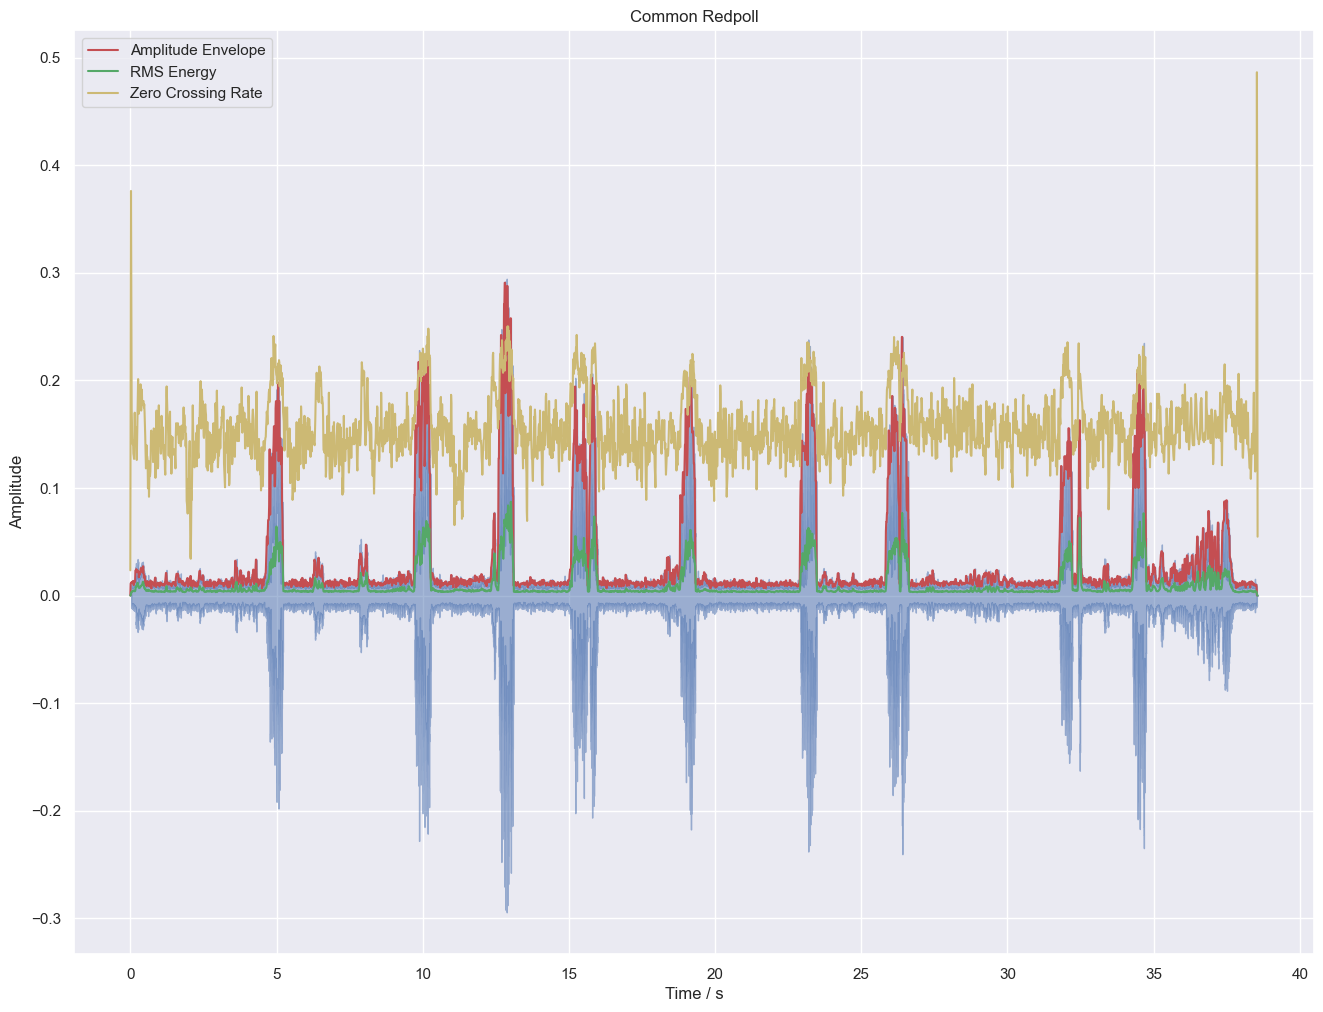

In [14]:
plot_waveform("./bird/songs/songs/xc132608.flac", "Common Redpoll")

## **Marsh Warbler**

Next, we will do the same thing for the bird species **Marsh Warbler**

Audio sample `xc82715` of **Marsh Warbler**

In [15]:
ipy.display.Audio("./bird/songs/songs/xc82715.flac")

In [16]:
get_basic_info("./bird/songs/songs/xc82715.flac")

Duration of audio clip: 16.22s
Sample size of audio clip (one parameter for mono, two for stereo): (357696,)
Sample Rate of aduio clip: 22050


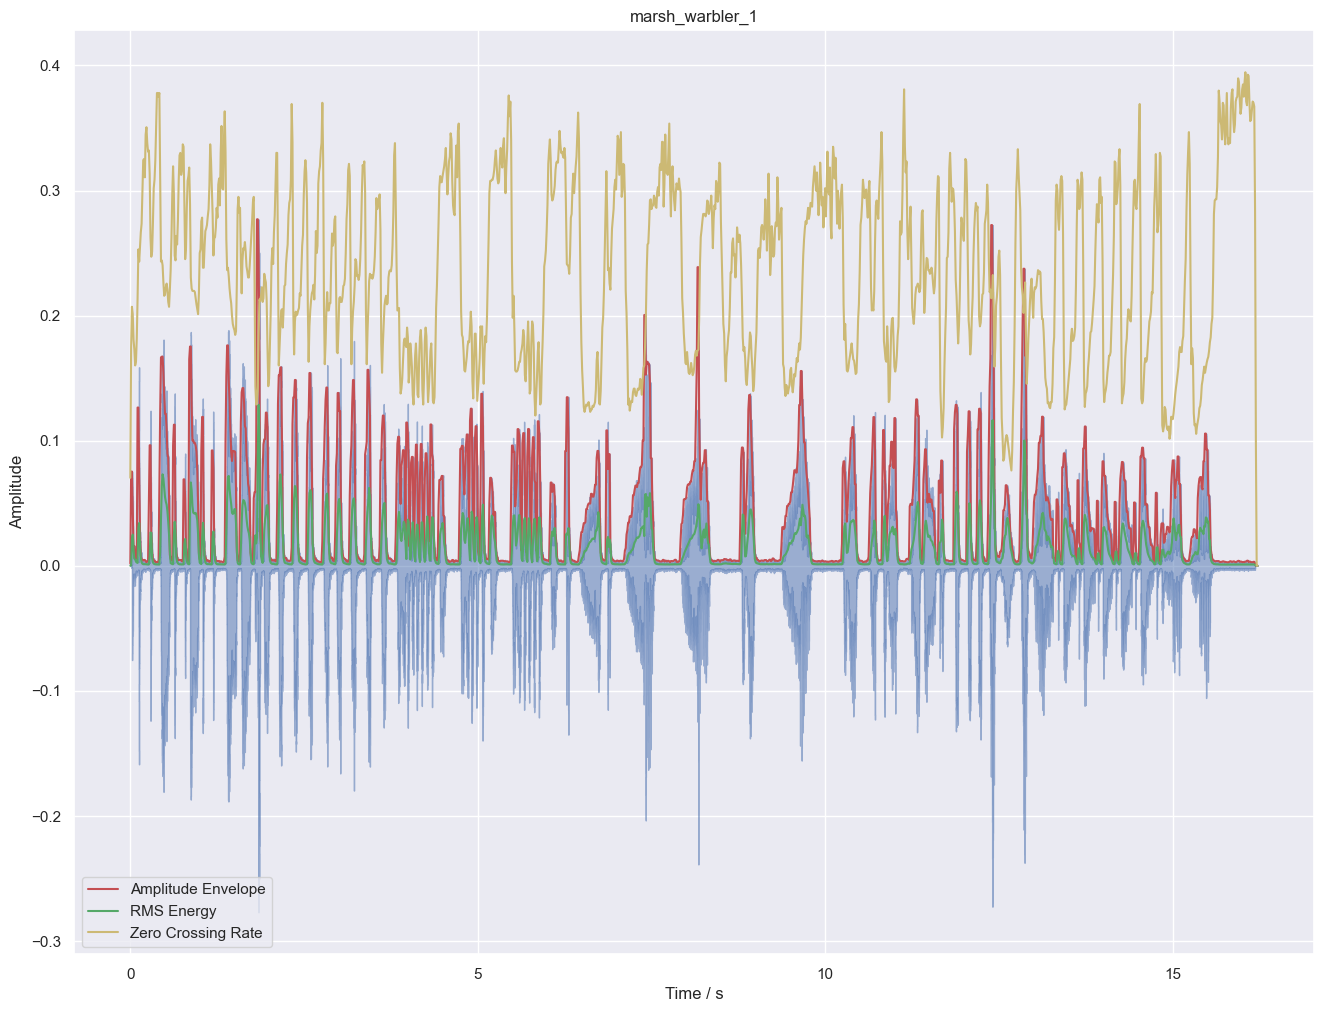

In [17]:
plot_waveform("./bird/songs/songs/xc82715.flac", "marsh_warbler_1")

# Initial Analysis

At first glance, it is quite easy to see that the time features of the different birds are quite different. To better visualise this, let's compare the individual features.

## Comparison between Amplitude Envelope

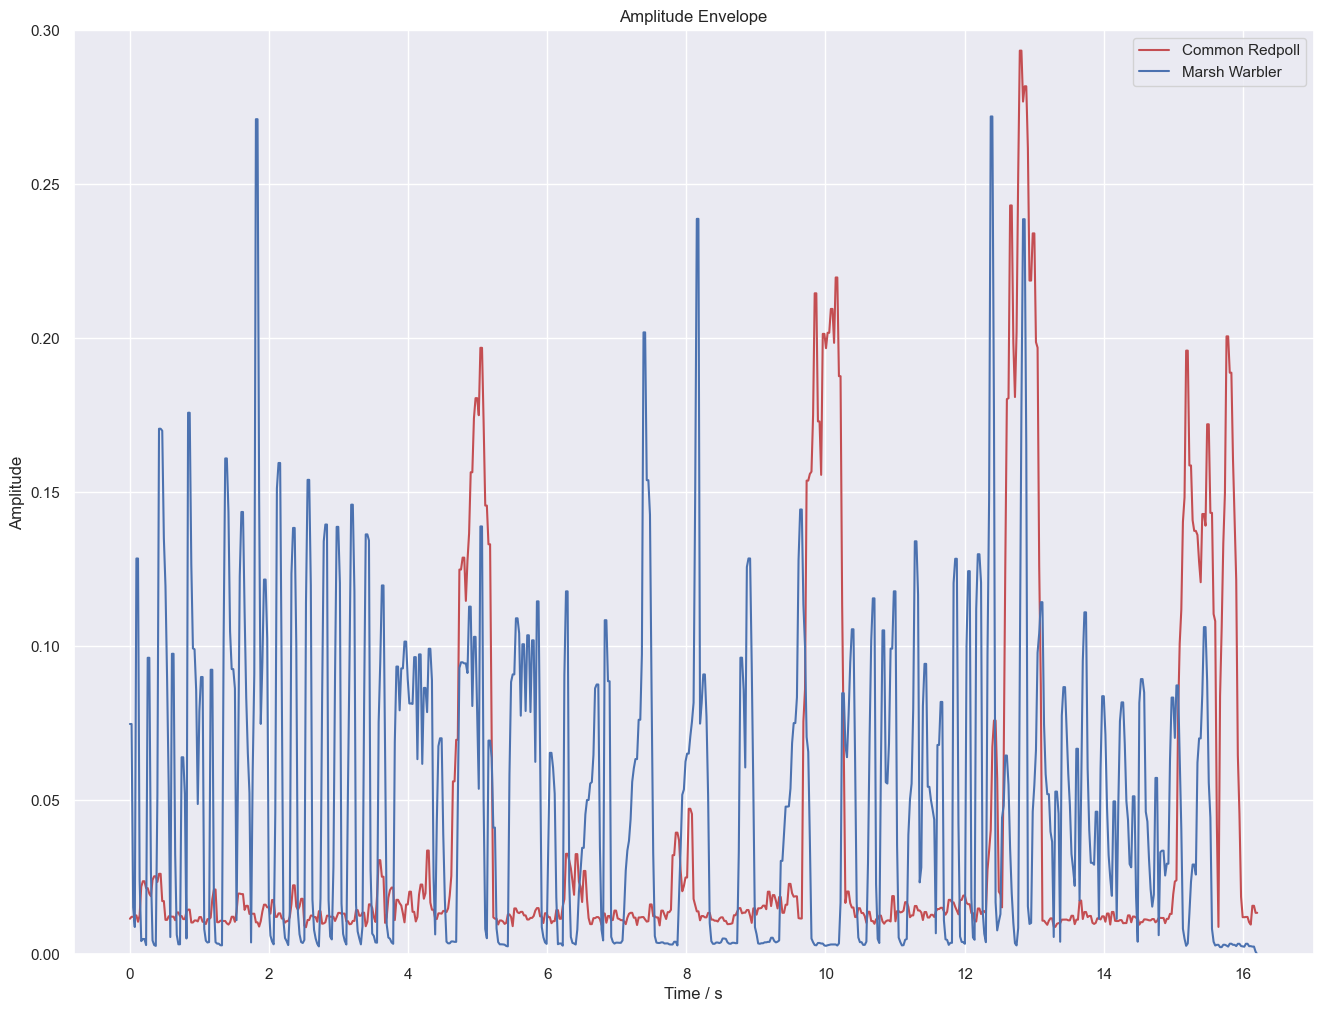

In [18]:
compare_ampltidue_envelope("./bird/songs/songs/xc132608.flac", "./bird/songs/songs/xc82715.flac", "Common Redpoll", "Marsh Warbler")

The amplitude envelope in this case seemed to not be a very clear feature for the case of Common Redpoll and Marsh Warbler as their peaks are rather similar. Aother distinct feature is that the *period* of the bird song for Marsh Warbler is much shorter, hinting a signficant difference between their frequency.  

**Note:** Our function truncates the audio to fit whichever is shorter. See function definitions for more details.

## Comparison between RMS Energy

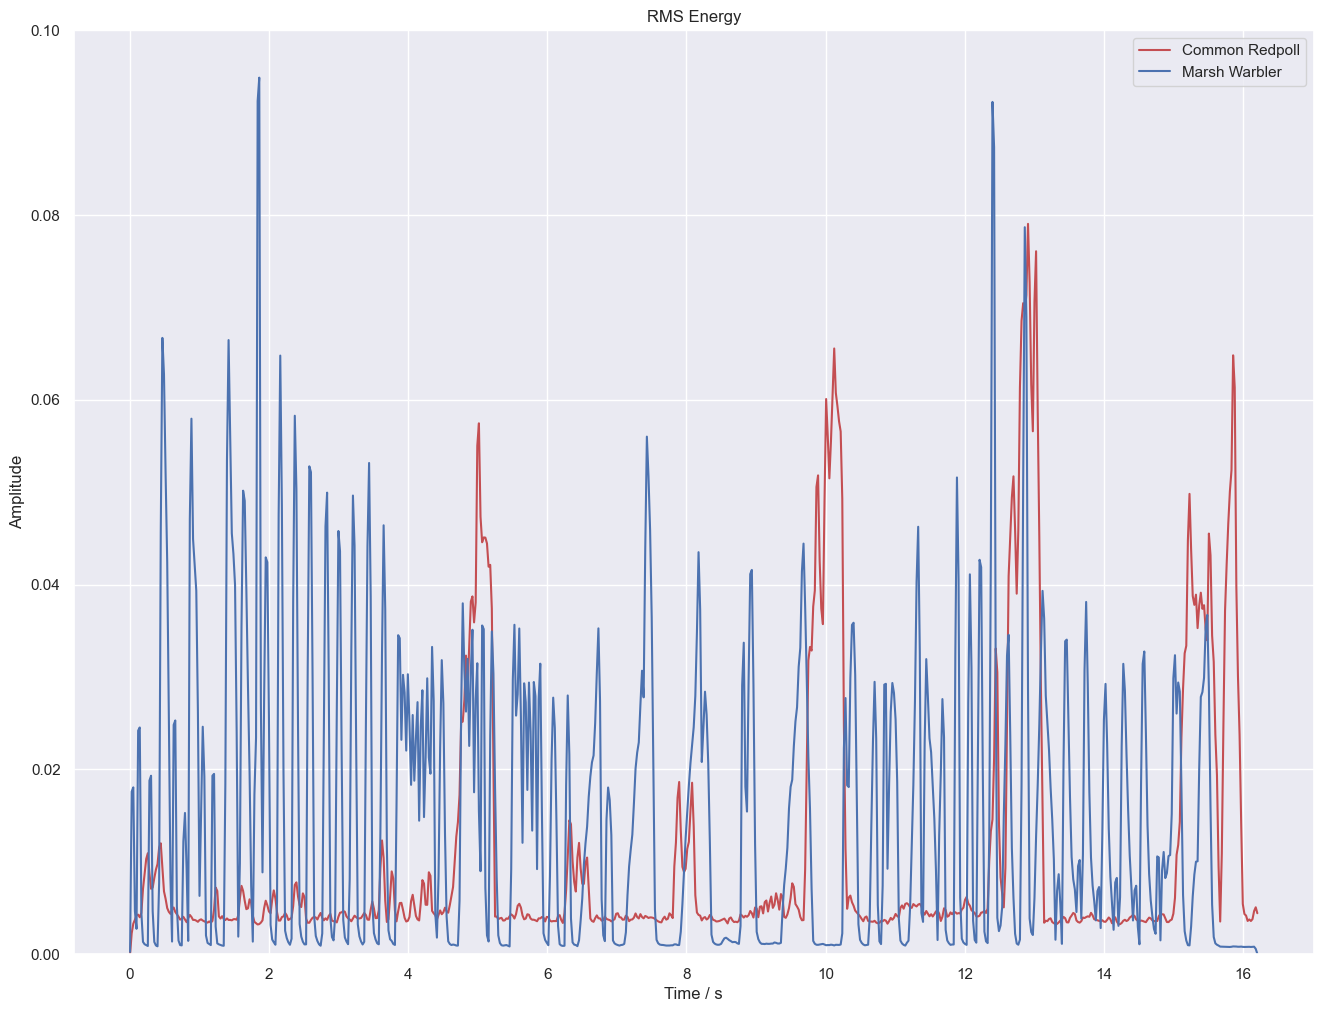

In [19]:
compare_rms_energy("./bird/songs/songs/xc132608.flac", "./bird/songs/songs/xc82715.flac", "Common Redpoll", "Marsh Warbler")

We see that in this case, Marsh Warbler has a higher peak than that Common Redpoll, which signified higher intensity of its birdsong. However, it remains clear that the most distinctive part about them is the frequency.

## Comparison between Zero Crossing Rate

Note that Zero Crossing Rates on the previous graphs are the **normalised** ones. In this comparison, we converted them into the **actual** crossing rates. This is done by by mulitplying the ZRC by its frame length.

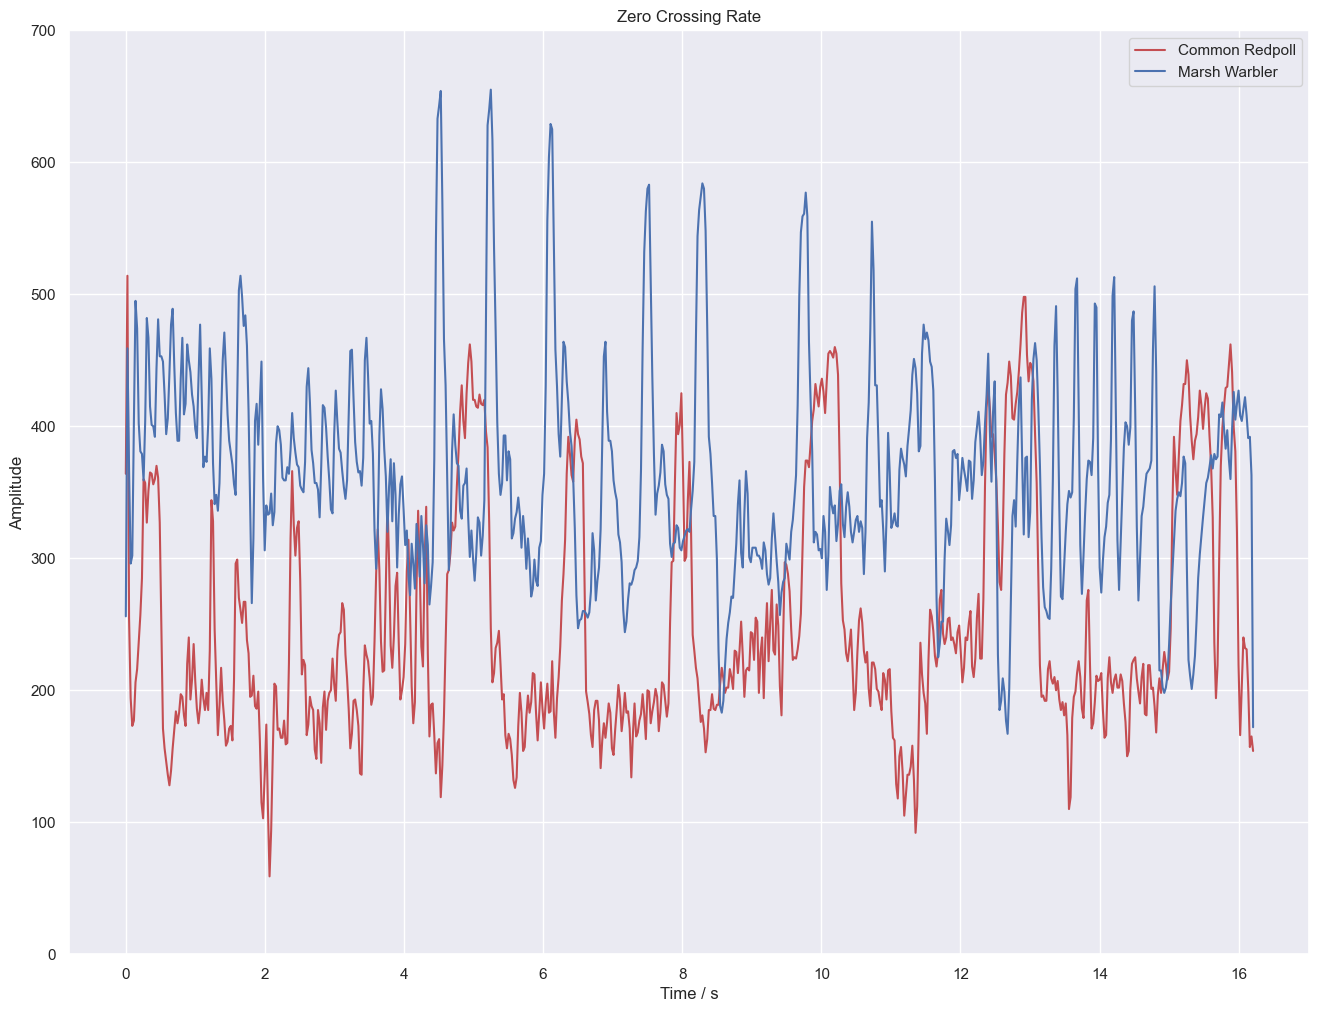

In [20]:
compare_zrc("./bird/songs/songs/xc132608.flac", "./bird/songs/songs/xc82715.flac", "Common Redpoll", "Marsh Warbler")

We see that the Marsh Warbler has a higher Zero Crossing Rate than Common Redpoll, which signified a higher "pitch" (*note: there are different mathematical models representing perceived pitch and actual pitch, which is beyond the scope of this project and we will just continue to use pitch to describe pitch as we know it*). This also signified that **frequency** has an important role in differentiating which birds are they.

# **Time-frequency Domain**

## **Fourier Transformation**
The general (and very superficial) concept is that for each frequency, we want to find a sinusoid counterpart, optimise their phase difference, such that we can find their similarity in terms of the magnitude. Freuqency with higher magnitude would suggest that it is more important for that signal. The rigourous mathematics has been abstracted by the different libraries and its discussion is beyond the scope of this project.

## **Frequency Spectrum**
Frequency spectrum make use of variations of Fourier Transformation. The resultant graph is a an amplitude against frequency. It allows to see the distribution of the frequency bands for the different audio signals.

In [38]:
# Function Definitions

def plot_frequency_spectrum(path, title):
    y, sr = librosa.load(path)
    ft = np.fft.fft(y)
    magnitude = np.absolute(ft)
    frequency = np.linspace(0, sr, len(ft))
    frequency_bins = int(len(frequency) * 0.5)  # Nyquist Frequency, and so we don't create a mirror
    plt.figure(figsize=(16, 8))
    plt.plot(frequency[:frequency_bins], magnitude[:frequency_bins])
    plt.xlabel("Freuqency / Hz")
    plt.ylabel("Magnitude")
    plt.title("Frequency Spectrum of " + title)
    plt.xlabel('Frequency / Hz')
    plt.ylabel('Amplitude')
    plt.show()    

def compare_frequency_spectrum(path1, path2, title1, title2):
    duration = find_shorter_duration(path1, path2)
    y1, sr1 = librosa.load(path1, duration=duration)
    y2, sr2 = librosa.load(path2, duration=duration)
    ft1 = np.fft.fft(y1)
    ft2 = np.fft.fft(y2)
    magnitude1 = np.absolute(ft1)
    magnitude2 = np.absolute(ft2)
    frequency1 = np.linspace(0, sr1, len(ft1))
    frequency2 = np.linspace(0, sr2, len(ft2))
    frequency_bins1 = int(len(frequency1) * 0.5)
    frequency_bins2 = int(len(frequency2) * 0.5)
    plt.figure(figsize=(16, 8))
    plt.plot(frequency1[:frequency_bins1], magnitude1[:frequency_bins1], alpha=0.5, color="r", label=title1)
    plt.plot(frequency2[:frequency_bins2], magnitude2[:frequency_bins2], alpha=0.5, color="b", label=title2)
    plt.xlabel("Freuqency / Hz")
    plt.ylabel("Magnitude")
    plt.title("Frequency Spectrum Comparison")
    plt.xlabel('Frequency / Hz')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()    

## Common Redpoll

The following is the frequency spectrum for **Common Redpoll**

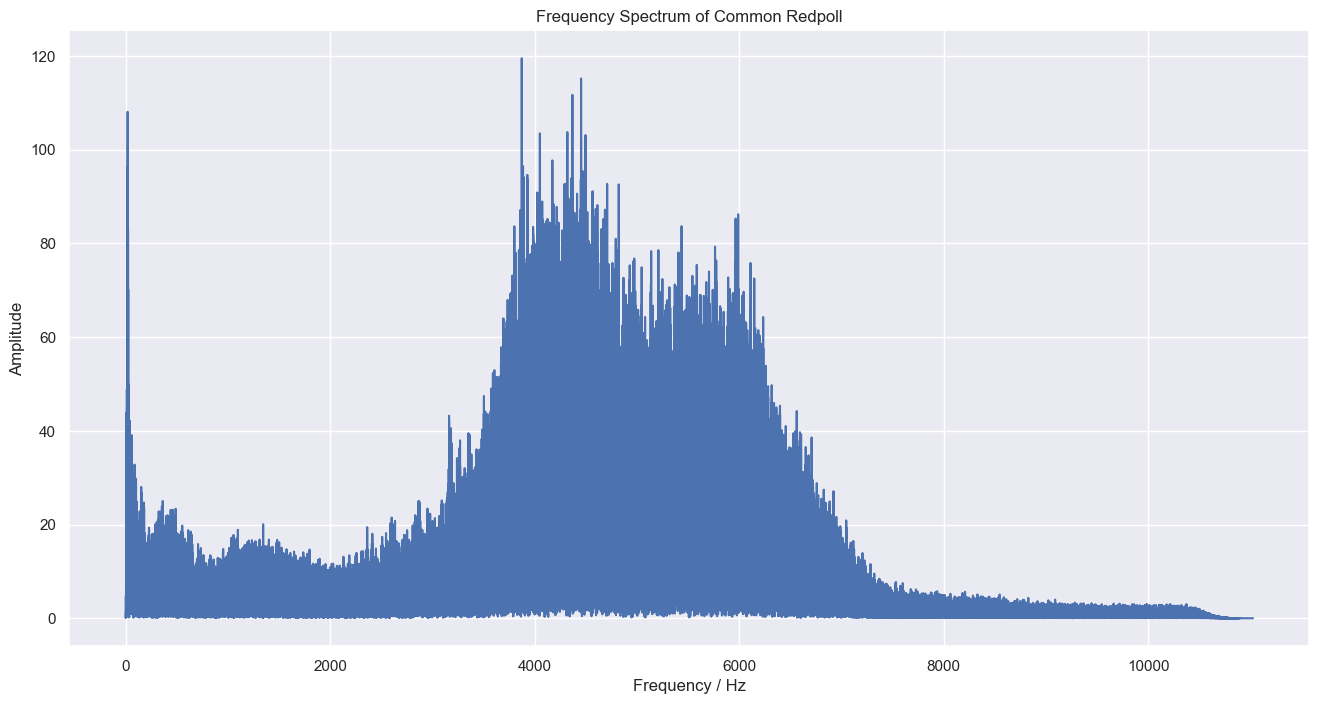

In [29]:
plot_frequency_spectrum("./bird/songs/songs/xc132608.flac", "Common Redpoll")

We see that There is a spike at frequency 0, this is likely due to **noise**. 

## Marsh Warbler

The following is the frequency spectrum for **Marsh Warbler**

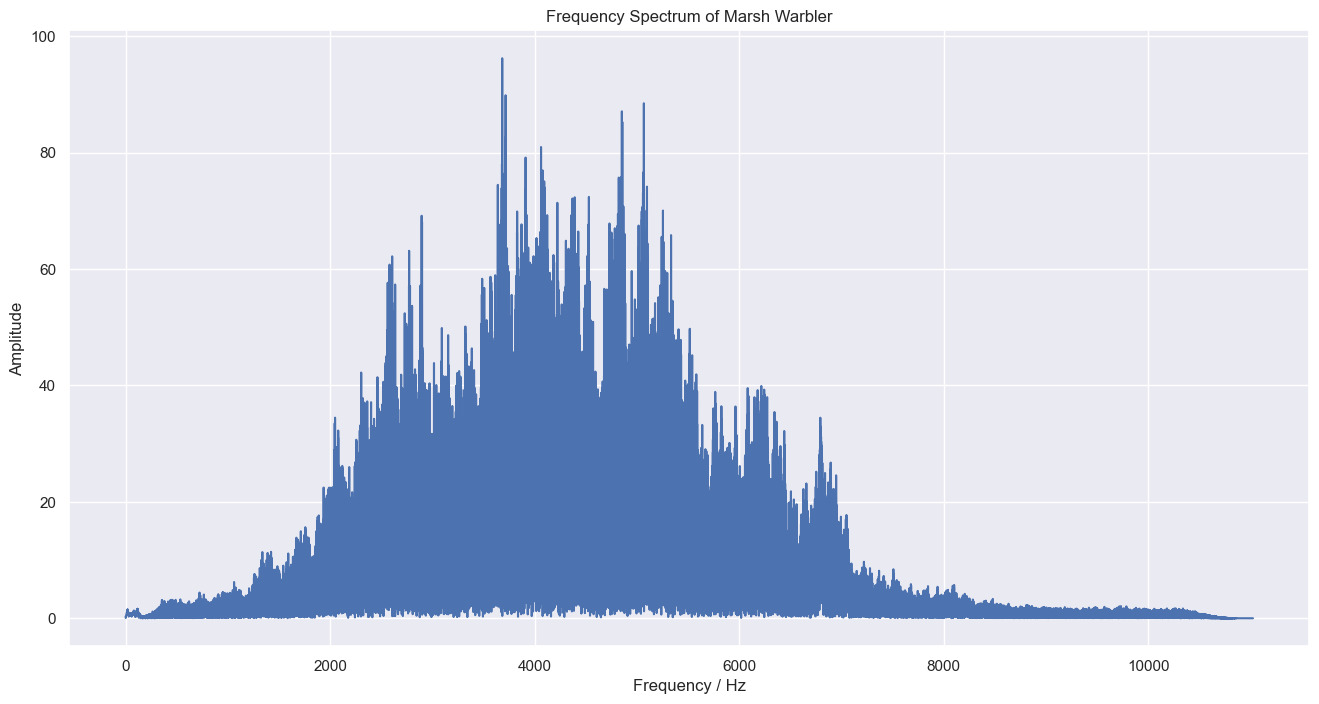

In [31]:
plot_frequency_spectrum("./bird/songs/songs/xc82715.flac", "Marsh Warbler")

## Comparison of Frequency Spectrum

To better visualise their differences, we plot them on the same graph. Note that we again truncate the recording duration to the shorter one. For the frequency analysis, we are more interested in the **distrbution** of the freuqency bands, so even if we did not truncate the durations, the amplitude may differ but the distribution will still be roughly the same.

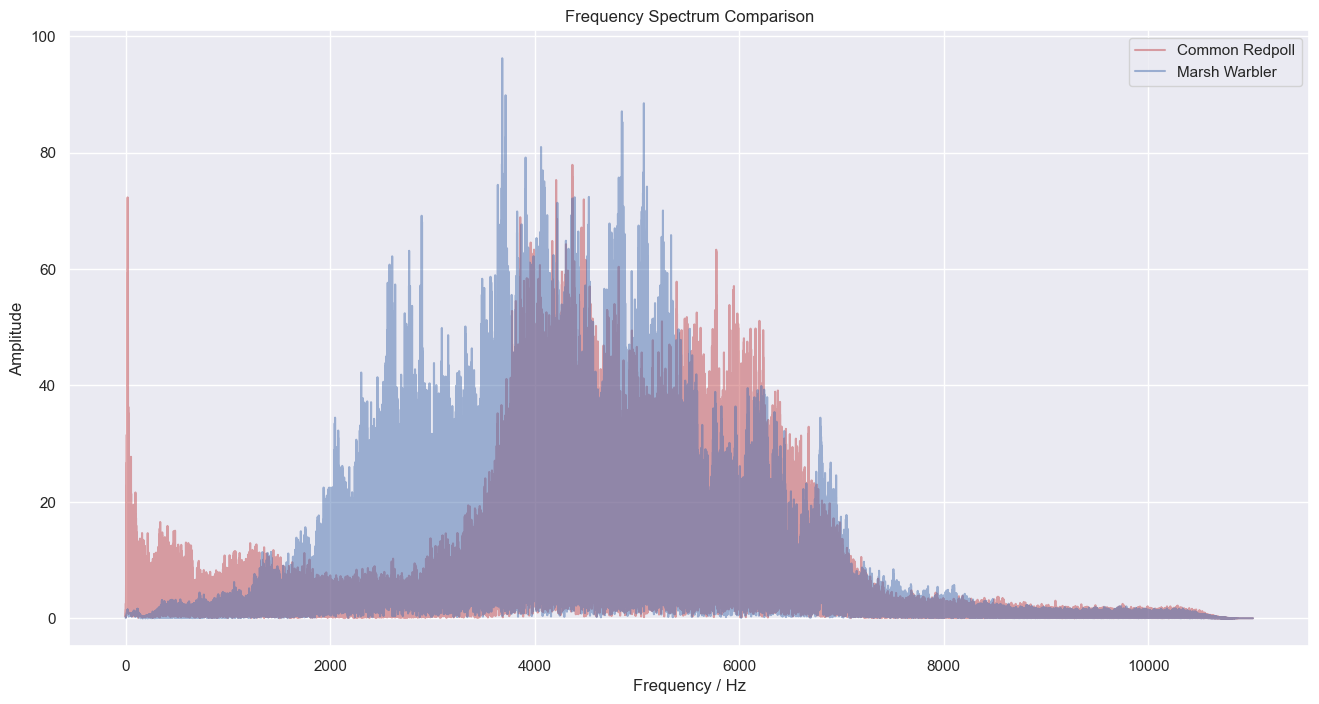

In [39]:
compare_frequency_spectrum("./bird/songs/songs/xc132608.flac", "./bird/songs/songs/xc82715.flac", "Common Redpoll", "Marsh Warbler")

We see that for the **Common Redpoll**, its frequency range is distributed between **3800Hz to 7000Hz**, while that of the **Marsh Warbler** is distributed between **2000Hz to 7000Hz**. This is not surpsing as the vocal range of song birds lie between **1000Hz to 8000Hz**.   

We see that the **Marsh Warbler** has clearly a more lower bound of vocal range than **Common Redpoll**. This suggsests that the frequency-domain can be an important feature.

# **Time-Frequency Domain**

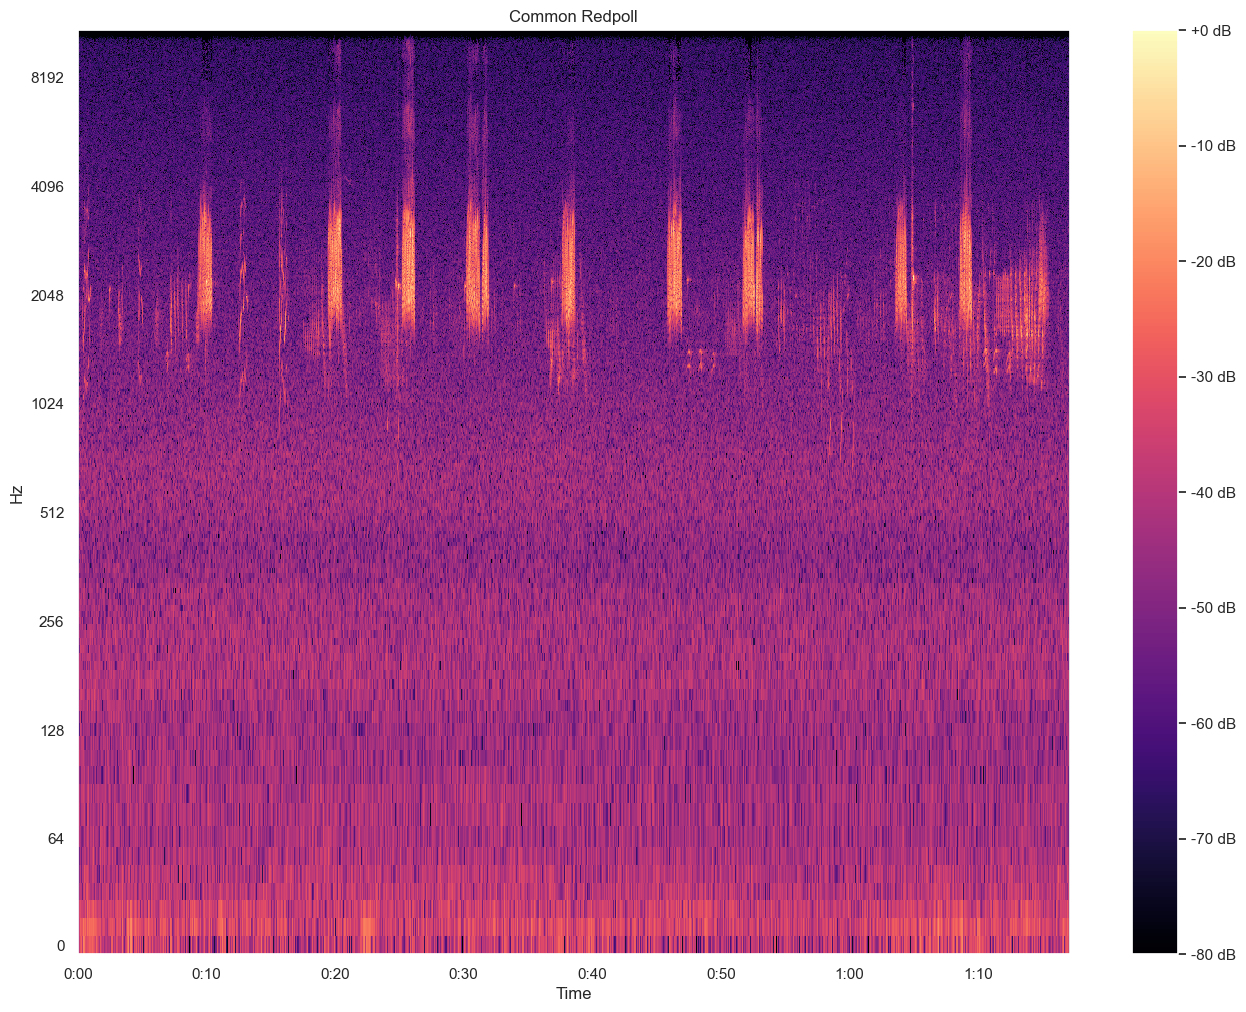

In [26]:
plot_stft("./bird/songs/songs/xc132608.flac", "Common Redpoll")

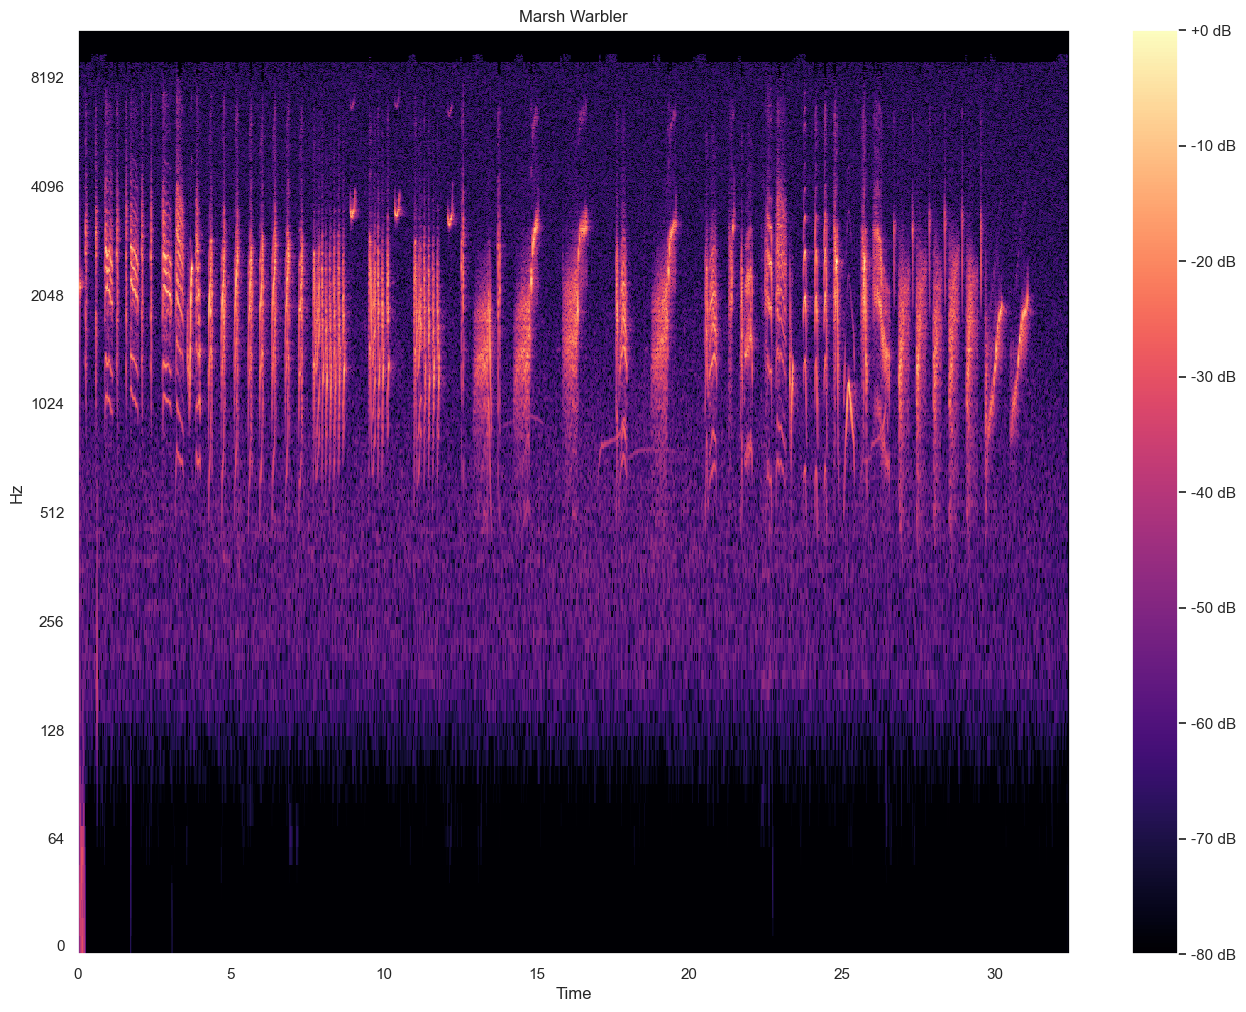

In [27]:
plot_stft("./bird/songs/songs/xc82715.flac", "Marsh Warbler")

# Intelligent Audio Systems

There are generally two ways in which we can train our models in audio data. The first is by picking important audio features and passing it to a Machine Learning model. The second way is by passing raw data, such as the waveform or the spectrogram, to a deep neural network. This second way is Deep Learning, which does the feature extraction for us automatically.  

We can explore both ways and test their accuracy

# Data Cleaning  
- The audiofiles are of different duration
- Need to find the right transformation for audio file
- The have different period (starting time different)
- Need to label each audio with the bird name
- Need to find a way to clear the "noise" of the environment
- Applying windowing

# Documentation of Library  
- Explain the use of the library
- Also need to explain the transformations